### 0. Goals of this project
##### - Build a model using Linear Regression (LR) to predict house prices given its characteristics.
##### - Learn to use different metrics to determine the accuracy of the model.

### 1. Imports and Data Set Information

This step is a good way to start your project. You immediately have access to a lot of important information.

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for ML model


In [270]:
original_df = pd.read_csv('Housing.csv')
df = original_df.copy(deep=True)

In [271]:
df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [272]:
#Price column values have an extra 0, so remove last 00 from each value

df['price'] = df['price'].apply(lambda x: x/10)

In [273]:
df['price'].head()

0    1330000.0
1    1225000.0
2    1225000.0
3    1221500.0
4    1141000.0
Name: price, dtype: float64

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [275]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+05,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+05,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+05,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+05,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+05,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+05,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+06,16200.000000,6.000000,4.000000,4.000000,3.000000


In [276]:
median_house_price = round(df['price'].median(), 2)
mean_house_price = round(df['price'].mean(),2 )

print("Median house price: ", median_house_price)
print("Mean house price: ", mean_house_price)

if median_house_price < mean_house_price:
    print('Median is higher than mean. Distribution is probably right-tail skewed')
elif median_house_price > mean_house_price:
    print('Median is lower than mean. Distribution is probably left-tail skewed')
else:
    print('Median and mean house prices are equal')

print("To be confirmed in data preprocessing")


Median house price:  434000.0
Mean house price:  476672.92
Median is higher than mean. Distribution is probably right-tail skewed
To be confirmed in data preprocessing


A right-tail distribution indicates our dataset has a higher concentration of points around the lower-end of the price range, but the mean is being pulled up by the higher priced houses. We must take this into account when training our model. 

### 2. Checking for missing values

It's always a good idea to make sure the entries are usable and relevant by checking them.

In [277]:
original_count = len(df['price'])
df_copy_count = len(df.dropna(axis=0, inplace=False)) #dropping any empty rows in a dataset copy
num_rows_dropped = original_count- df_copy_count
print(num_rows_dropped)

#No null values 

0


In [278]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1225000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1225000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1221500.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1141000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 3. Exploratory Data Analysis

#### 3.1 Overview

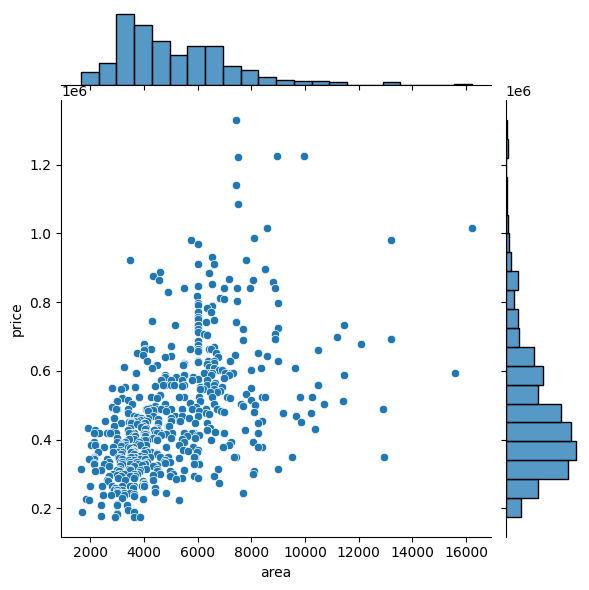

In [279]:
#Quick example
sns.jointplot(x= 'area', y ='price', data= df)

Note: It would be a good idea to drop any houses with a price above 1 000 000$ , as their price is more likely determined by location/neighbourhood and other intangibles, rather than the features used for the model's training. I will do the same for houses with areas above 10 000 m^2.

In [ ]:
#Dropping extreme values
df = df[df['price']< 1000000]
df = df[df['area']< 12000]

In [281]:
df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,987000.0,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,980000.0,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
11,968100.0,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,931000.0,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,924000.0,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,924000.0,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
15,910000.0,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,910000.0,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,896000.0,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,889000.0,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished


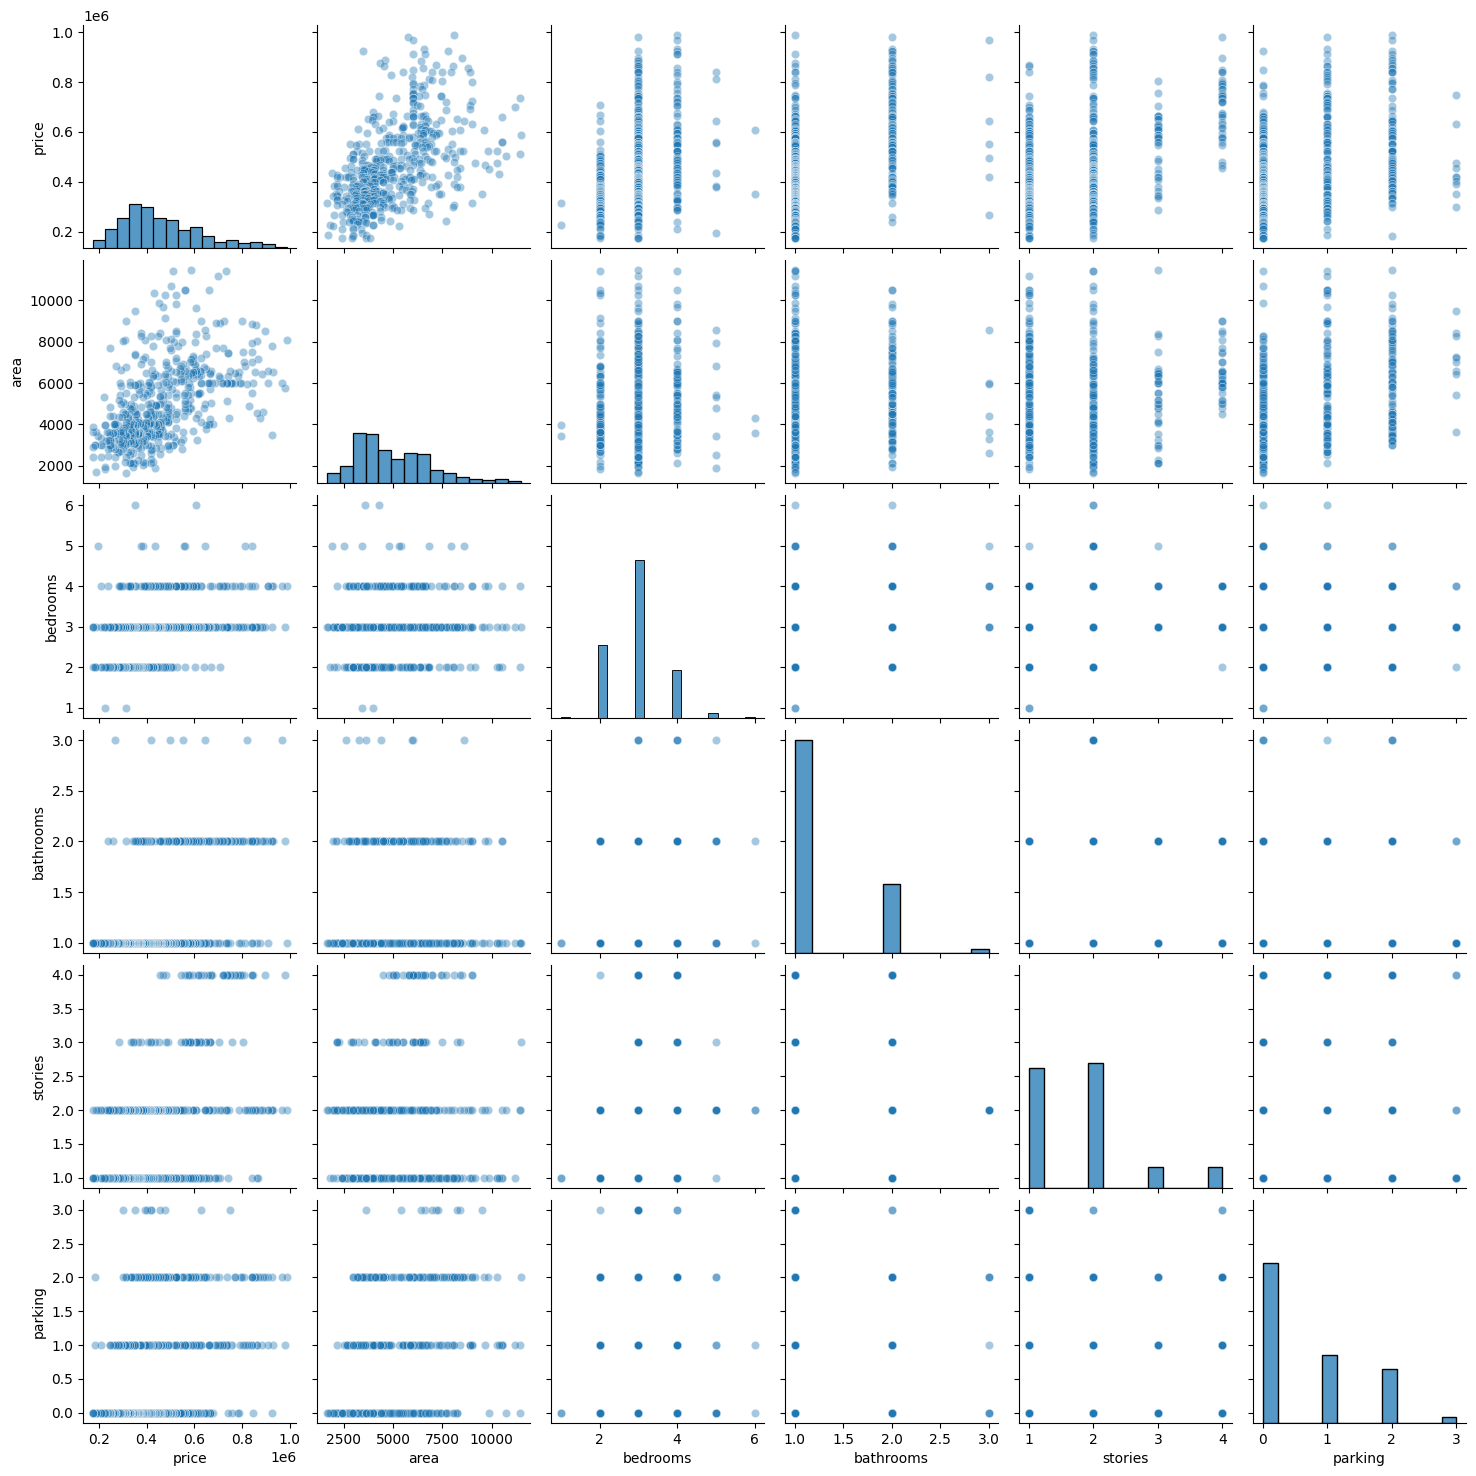

In [282]:
#Using pairplot because there are not that many columns with numerical entries
sns.pairplot(df, kind = 'scatter', plot_kws ={'alpha': 0.4} )

##### 3.2 Thoughts About the Graphs

The dataset has a higher concentration of data points for houses around the $2 000 000 - $6 000 000 price range. This could negatively affect our model; It would have a harder predicting 
higher costing houses, due to it having less data to rely on. This in turn adds more weight to outliers.

To negate the outliers' effect, I will separate the dataset using stratification in Step 3 (Data Wrangling). 

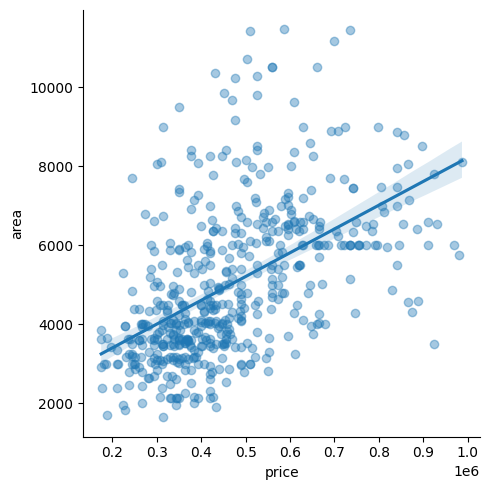

In [283]:
#Simple Linear Model plot to strenghten my point
sns.lmplot(x = 'price',
           y = 'area',
           data = df,
           scatter_kws = {'alpha': 0.4})

### Step 4: Data Wrangling

##### 4.1 Transforming categorical variables

In [284]:
#First, use a binary mapping for any binary categories (yes/no columns)
#and One-Hot Encoding for non-binary categories

yes_no_binary_mapping = {'no': 0, 'yes':1}
cols_for_binary_mapping = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']


In [285]:
#applying binary mapping
mapped_cols = df[cols_for_binary_mapping].map(lambda x: yes_no_binary_mapping[x]) #a new series
df = df.drop(cols_for_binary_mapping, axis=1)

In [286]:
df = pd.concat([df, mapped_cols], axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
8,987000.0,8100,4,1,2,2,furnished,1,1,1,0,1,1
9,980000.0,5750,3,2,4,1,unfurnished,1,1,0,0,1,1
11,968100.0,6000,4,3,2,2,semi-furnished,1,1,1,1,0,0
12,931000.0,6550,4,2,2,1,semi-furnished,1,0,0,0,1,1
13,924000.0,3500,4,2,2,2,furnished,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,182000.0,3000,2,1,1,2,unfurnished,1,0,1,0,0,0
541,176715.0,2400,3,1,1,0,semi-furnished,0,0,0,0,0,0
542,175000.0,3620,2,1,1,0,unfurnished,1,0,0,0,0,0
543,175000.0,2910,3,1,1,0,furnished,0,0,0,0,0,0


In [287]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas') 
ohetransform = ohe.fit_transform(df[['furnishingstatus']])

In [288]:
df = pd.concat([df, ohetransform], axis=1)

In [289]:
df = df.drop('furnishingstatus', axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
8,987000.0,8100,4,1,2,2,1,1,1,0,1,1,1.0,0.0,0.0
9,980000.0,5750,3,2,4,1,1,1,0,0,1,1,0.0,0.0,1.0
11,968100.0,6000,4,3,2,2,1,1,1,1,0,0,0.0,1.0,0.0
12,931000.0,6550,4,2,2,1,1,0,0,0,1,1,0.0,1.0,0.0
13,924000.0,3500,4,2,2,2,1,0,0,1,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,182000.0,3000,2,1,1,2,1,0,1,0,0,0,0.0,0.0,1.0
541,176715.0,2400,3,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0
542,175000.0,3620,2,1,1,0,1,0,0,0,0,0,0.0,0.0,1.0
543,175000.0,2910,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


##### 4.2 Splitting Predicting and Target variables

In [290]:
#Want a df with only influencing factors -> create a deep copy and drop the the target variable

X = df.drop('price', axis=1, inplace=False) #i.e. pricing factors
y = df.copy(deep = True)['price']

In [291]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Building the Baseline Model

In this step, I will create a simple LR model with no refined preprocessing techniques or model validation methods. This will serve as our base model, and comparing its metric to a model with hyperparameter tuning.

In [292]:
#training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression() #instance of our model
lm.fit(X_train, y_train)
print("Base model created.")

Base model created.


In [293]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'] )
cdf

,Coef
area,21.700273
bedrooms,8048.496146
bathrooms,85437.341404
stories,40446.521809
parking,9522.868892
mainroad,41112.868444
guestroom,52840.082508
basement,9976.923055
hotwaterheating,35451.771366
airconditioning,82166.736858


In [294]:
#predictions
predictions_test_base = lm.predict(X_test)
predictions_train_base = lm.predict(X_train) #for evaluating later on
print(len(y_test))

160


Text(0.5, 1.0, 'Evaluation of our LN Model')

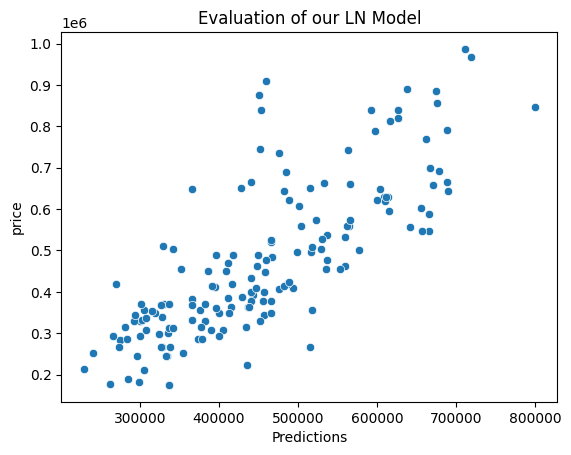

In [295]:
#The straighter the scatter, the better our model
sns.scatterplot(x= predictions_test_base, y= y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our LN Model')

In [296]:
def relative_MAE(MAE, mean_for_target_val):
    rel_MAE = round((MAE/mean_for_target_val), 2) * 100

    return rel_MAE

In [297]:
#Evaluating the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

r2_train_base = r2_score(y_train, predictions_train_base)
r2_test_base = r2_score(y_test, predictions_test_base)


train_MAE_base = mean_absolute_error(y_train, predictions_train_base)
train_RMSE_base = math.sqrt(mean_squared_error(y_train, predictions_train_base))
test_MAE_base = mean_absolute_error(y_test, predictions_test_base)
test_RMSE_base =  math.sqrt(mean_squared_error(y_test, predictions_test_base))

test_set_rel_MAE = relative_MAE(test_MAE_base, mean_house_price)


In [319]:
print("Baseline Training R²:", r2_train_base)
print("Baseline Test R²:", r2_test_base)

print('Baseline Train Mean Absolute Error: ', train_MAE_base)
print("Baseline Train Root Mean Squared Error: ", train_RMSE_base)
print("Baseline Test Mean Absolute Error: ", test_MAE_base)
print("Baseline Test Root Mean Squared Error: ", test_RMSE_base)
#print("The difference between the train RMSE and test RMSE is", diff_RMSE )

Baseline Training R²: 0.689314116637322
Baseline Test R²: 0.5919242008055272
Baseline Train Mean Absolute Error:  66645.48416093938
Baseline Train Root Mean Squared Error:  88235.21195201532
Baseline Test Mean Absolute Error:  84010.28058911729
Baseline Test Root Mean Squared Error:  118113.61603431466


#### Evaluation of metrics
**1. Differences between RMSE and MAE for the training and test dataset** <br>
There are large differences between the training set's RMSE and MAE with the test set's RMSE and MAE. This could be due to how the dataset was split, as in the distribution for each subset are not equal.<br>
    Potential fix: Apply stratification while splitting the dataset.


**2. Value of test set's MAE value** <br>
The test set has a MAE of $920 392.94, which means, on average, the model will be off by more than $920 000 (or 19% ) when predicting house prices.<br>
    Potential fix: Improve accuracy using cross-validation (check how well the model fits the data) and apply log-transformation to reduce the weight of outliers. 

In [299]:
def relative_rmse_diff(rmse_base, rmse_new):

    gap = (abs(rmse_base- rmse_new)/rmse_base)

    return round(gap, 4) * 100

Because the training RMSE is much lower than the test RMSE, we know the model is overfitting (i.e. it is not generalizing properly to new/unseen data). To reduce overfitting, I will add a cross-validaton feature and split the test dataset into two: validation and test

### 6. Building the Second Model

In [300]:
#Second Model

lm2 = LinearRegression()


#### 6.1 Refining preprocessing technique

Another feature I will add is stratification; i.e. splitting the dataset into training/validation/test sets where the target variable (house price) for each subset has a similar distribution to the original set.

In [301]:
#Use stratification when splitting the data set 
n_bins = 6
price_bins = pd.qcut(df['price'], q=5, labels = False)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=price_bins, random_state=42)
bins_temp = price_bins.loc[X_temp.index]
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=bins_temp, random_state=42) 


Because y is skewed towards the right, use log-transform on y to reduce the impact of outliers on the model

In [302]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

In [303]:
lm2.fit(X_train, y_train_log)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [304]:
cdf = pd.DataFrame(lm2.coef_, X.columns, columns= ['Coefficents'])
cdf

,Coefficents
area,0.000044
bedrooms,0.011466
bathrooms,0.162266
stories,0.084980
parking,0.037581
mainroad,0.135931
guestroom,0.069460
basement,0.085945
hotwaterheating,0.197421
airconditioning,0.190769


#### 6.2 Adding a Model Validation Method

In [305]:
#Calculating RMSE in log-space 

#standard k-fold cross-validation 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

kf2 = KFold(n_splits=15, shuffle=True, random_state=42)
scores = cross_val_score(lm2, X_train, y_train_log.values.ravel(), cv=kf2, scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)


y_cross_val_pred = cross_val_predict(lm2, X_train, y_train_log, cv = kf2) #predictions for y_train with cross-val

cv_rmse = np.sqrt(mean_squared_error(y_train, np.exp(y_cross_val_pred)))

print("Mean CV RMSE: " , cv_rmse ) #Remember for later

Mean CV RMSE:  101687.90538928632


#### 6.3 Predictions

In [306]:
#predictions for lm2 (validation set)
y_train_pred_log = lm2.predict(X_train)
y_val_pred_log = lm2.predict(X_val)

#Convert units out of log space
y_train_pred = np.exp(y_train_pred_log) 
y_val_pred = np.exp(y_val_pred_log)


In [307]:
#Note
#We compare the training RMSE to the CV RMSE to see how well our model generalized the data it saw
#We then compare the validation set's RMSE to the CV RMSE 

#### 6.4 Evaluating the model

In [308]:
#To see how well our model generelizes information, we want to compare the KFold RMSE to the training set's RMSE

train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

cv_train_rmse_gap = relative_rmse_diff(train_rmse, cv_rmse)
cv_val_rmse_gap = relative_rmse_diff(cv_rmse, val_rmse)


In [309]:
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

train_MAE = mean_absolute_error(y_train, y_train_pred)
val_MAE = mean_absolute_error(y_val, y_val_pred)

val_set_rel_MAE = relative_MAE(val_MAE, mean_house_price)

In [310]:
print("Training R²:", r2_train)
print("Validation R²:", r2_val)
print('\n')
print("Training set RMSE: ", train_rmse)
print("Validation set RMSE: ", val_rmse)
print('\n')
print("Relative gap between CV RMSE and training set's RMSE: ", cv_train_rmse_gap, "%")
print("Relative gap between CV RMSE and validation set's RMSE: ", cv_val_rmse_gap, "%")
print('\n')
print('Train MAE: ', train_MAE)
print("Validation MAE: ", val_MAE)
print("The relative MAE for the validation set is", val_set_rel_MAE, "%")
#print("The difference between the train RMSE and test RMSE is", diff_RMSE )

Training R²: 0.6672401014823562
Validation R²: 0.6885052397835927


Training set RMSE:  96625.27681611698
Validation set RMSE:  92894.22658076674


Relative gap between CV RMSE and training set's RMSE:  5.24 %
Relative gap between CV RMSE and validation set's RMSE:  8.649999999999999 %


Train MAE:  70781.17301928629
Validation MAE:  70052.6065842803
The relative MAE for the validation set is 15.0 %


##### 6.5 Thoughts about this model's metrics

- Training R^2=0.70 , and validation R^2=0.69.
- Training RMSE and CV RMSE are within 5% of each other, suggesting the model does not overfit.
- CV RMSE and validation RMSE are within 5% of each other, indicating the model generalizes well to new information. This is also supported by the R^2 scores for these sets being very close.
- MAEs are much lower than RMSEs, indicating there is the presence of large variances in the dataset, pulling up the MAE value. This makes sense, as there are fewer data points for higher priced houses.


### 7. Final Predictions 

#### 7.1 Testing Final Set

Text(0.5, 1.0, 'Evaluation of our LN Model')

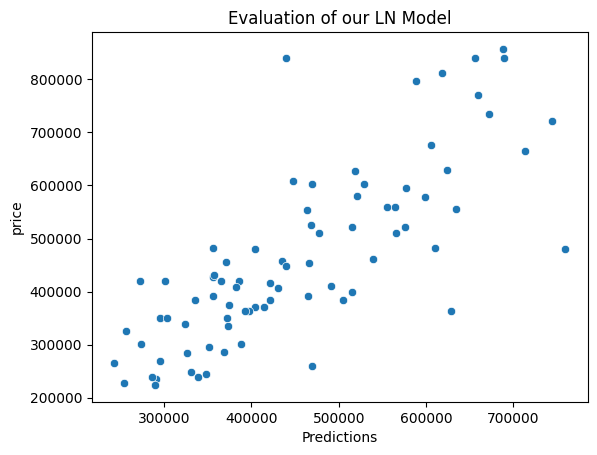

In [311]:
#Use lm2
#recall the model was trained in log space

y_test_pred_log = lm2.predict(X_test)
y_test_pred = np.exp(y_test_pred_log)

sns.scatterplot(x= y_test_pred, y= y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our LN Model')

In [313]:
r2_test = r2_score(y_test, y_test_pred)

test_RMSE = math.sqrt(mean_squared_error(y_test, y_test_pred))
test_MAE = mean_absolute_error(y_test, y_test_pred)
print("test R^2 score: ", r2_test)

print("test RMSE: ", test_RMSE)
print("test MAE: ", test_MAE)

test R^2 score:  0.6045684231580963
test RMSE:  103421.26748155827
test MAE:  76805.1348160636


#### 7.2 Comparison Between Baseline Predictions and Current Model

In [ ]:
r2_rel_diff = ((r2_test - r2_test_base)/ r2_test_base) * 100
MAE_rel_diff = abs(((test_MAE - test_MAE_base)/test_MAE_base) * 100)
RMSE_rel_diff = abs(((test_RMSE - test_RMSE_base)/test_RMSE_base) * 100)

print("Improvement in r^2 score: ", r2_rel_diff, "%!")
print("Decrease in MAE: ", MAE_rel_diff, "%")
print("Decrease in RMSE: ", RMSE_rel_diff, "%")


Improvement in r^2 score:  2.136121877659687 %!
Decrease in MAE:  8.57650483075169 %
Decrease in RMSE:  12.439165818518275 %


### 8. Final Thoughts

With the enhanced data preprocessing techniques (stratification, log-transformation of the target variable) and the use of cross-validation, there is a 8.57% decrease in MAE and 12.43% decrease in RMSE. There was also a 2% improvement for the model fit.